# Pymaceuticals Inc.
---

### Analysis

Looking at the boxplot in particular you can find that Capomulin and Ramicane greatly out perform Infubinol and Ceftamin in the amount the reduce tumors.

Another insite was the relation between tumor size and mouse weight. The larger mice had larger tumors. 
 

In [2]:
# Dependencies and Setup
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(left=mouse_metadata, right=study_results, left_on="Mouse ID", right_on="Mouse ID")

# Display the data table for preview
df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(df['Mouse ID'].unique())

249

In [4]:
filepath = Path("data/complete12.csv")
df.to_csv(filepath)

In [5]:
clean = df.drop_duplicates( subset = ['Mouse ID', 'Timepoint'])

In [6]:
clean[clean['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean['Mouse ID'].unique())

249

## Summary Statistics

In [8]:
average = clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean()
middle = clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median()
variance = clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var()
deviation = clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std()
error = clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem()

summary = {"Mean Tumor Volume":average, 'Median Tumor Volume':middle, 'Tumor Volume Variance': variance, "Tumor Volume Std. Dev.": deviation, 'Tumor Volume Std. Err.':error}
df_summary = pd.DataFrame(summary)
df_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

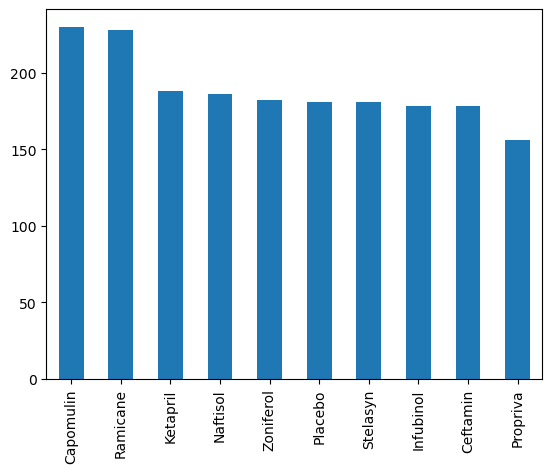

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

counting = clean['Drug Regimen'].value_counts().plot.bar(x='Drug Regimen')


In [10]:
another = clean['Drug Regimen'].unique()
another.sort()

clean['Drug Regimen'].value_counts().index

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object')

<BarContainer object of 10 artists>

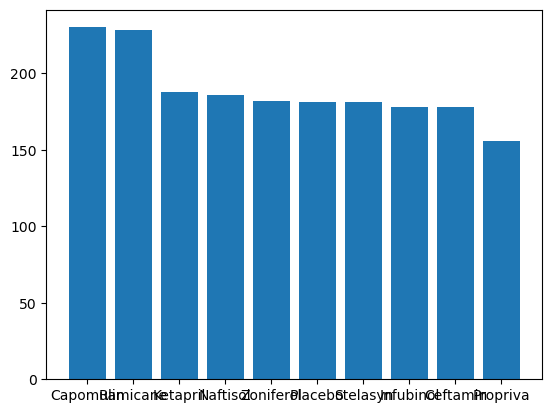

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(clean['Drug Regimen'].value_counts().index, clean['Drug Regimen'].value_counts())

<Axes: ylabel='Sex'>

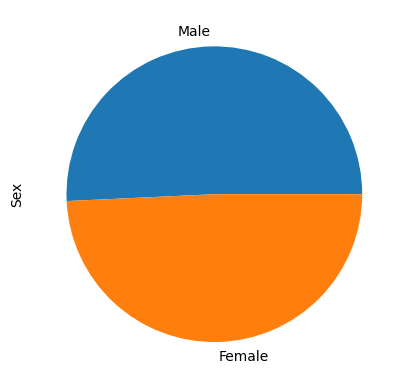

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean['Sex'].value_counts().plot.pie(y='Sex')

([<matplotlib.patches.Wedge at 0x7fd2bdd2cc10>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')],
 [Text(-0.013976124569910401, 0.5998372011987972, '50.7%'),
  Text(0.01397606840909865, -0.5998372025073339, '49.3%')])

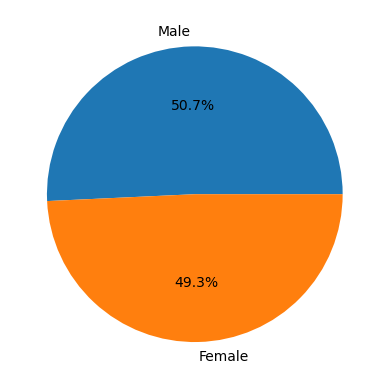

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean['Sex'].value_counts(), labels = clean['Sex'].value_counts().index, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [14]:
new = clean
new

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
new.sort_values(by=['Mouse ID','Timepoint'], inplace=True)

/var/folders/m0/k04x3z7x1pz1xw90lxl512480000gn/T/ipykernel_60463/3792463608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.sort_values(by=['Mouse ID','Timepoint'], inplace=True)


In [16]:
finial_tumor = new.drop_duplicates(subset=['Mouse ID'], keep='last')
finial_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
1862,z435,Propriva,Female,12,26,10,48.710661,0
84,z578,Ramicane,Male,11,16,45,30.638696,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [17]:
clean[clean['Mouse ID'] == 'z435']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1860,z435,Propriva,Female,12,26,0,45.000000,0
1861,z435,Propriva,Female,12,26,5,47.115980,0
1862,z435,Propriva,Female,12,26,10,48.710661,0


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin = finial_tumor[finial_tumor['Drug Regimen'] == 'Capomulin']
Ramicane = finial_tumor[finial_tumor['Drug Regimen'] == 'Ramicane']
Infubinol = finial_tumor[finial_tumor['Drug Regimen'] == 'Infubinol']
Ceftamin = finial_tumor[finial_tumor['Drug Regimen'] == 'Ceftamin']


In [29]:
Capomulin_V = Capomulin['Tumor Volume (mm3)']
Ramicane_V = Ramicane['Tumor Volume (mm3)']
Infubinol_V = Infubinol['Tumor Volume (mm3)']
Ceftamin_V = Ceftamin['Tumor Volume (mm3)']

Capomulin_R = Capomulin_V.reset_index(drop=True)
Ramicane_R = Ramicane_V.reset_index(drop=True)
Infubinol_R = Infubinol_V.reset_index(drop=True)
Ceftamin_R = Ceftamin_V.reset_index(drop=True)

In [30]:
Ceftamin_R

0     62.999356
1     45.000000
2     56.057749
3     55.742829
4     48.722078
5     47.784682
6     61.849023
7     68.923185
8     67.748662
9     57.918381
10    46.784535
11    59.851956
12    64.299830
13    59.741901
14    61.433892
15    64.192341
16    45.000000
17    52.925348
18    45.000000
19    67.527482
20    45.000000
21    64.634949
22    61.386660
23    68.594745
24    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [31]:
Tumor_size = pd.DataFrame({"Capomulin_V":Capomulin_R, 'Ramicane_V':Ramicane_R, 'Infubinol_V':Infubinol_R, 'Ceftamin_V':Ceftamin_R})
Tumor_size

,Capomulin_V,Ramicane_V,Infubinol_V,Ceftamin_V
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [20]:
quartiles = Capomulin_V.quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print(iqr)

7.781863460000004


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


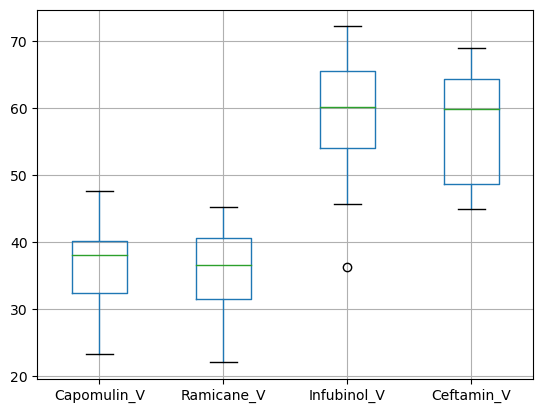

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = Tumor_size.boxplot()

## Line and Scatter Plots

/var/folders/m0/k04x3z7x1pz1xw90lxl512480000gn/T/ipykernel_60463/1875873263.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  linegraph = clean[clean["Drug Regimen"] == 'Capomulin'].groupby(['Timepoint']).mean()


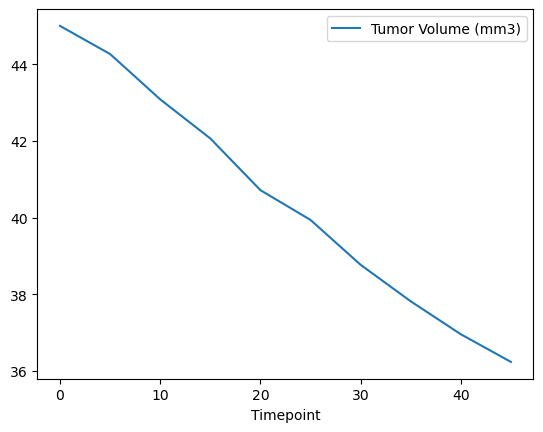

In [45]:
linegraph = clean[clean["Drug Regimen"] == 'Capomulin'].groupby(['Timepoint']).mean()
linegraph
line = linegraph.plot.line( y='Tumor Volume (mm3)')

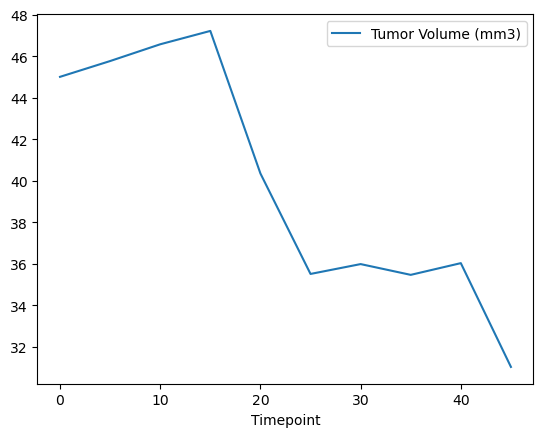

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single = clean[clean['Mouse ID']== 'u364'].plot.line(x='Timepoint', y='Tumor Volume (mm3)')

In [51]:
weight = mouse_metadata[mouse_metadata["Drug Regimen"] == 'Capomulin']['Weight (g)']
volume = clean[clean["Drug Regimen"] == 'Capomulin'].groupby(['Mouse ID']).mean()
 


/var/folders/m0/k04x3z7x1pz1xw90lxl512480000gn/T/ipykernel_60463/3944383905.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  volume = clean[clean["Drug Regimen"] == 'Capomulin'].groupby(['Mouse ID']).mean()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


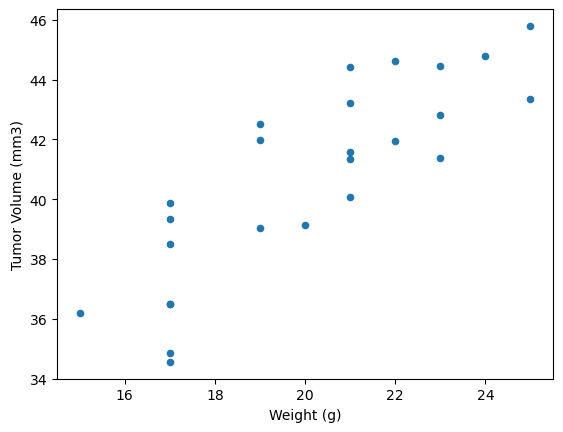

In [53]:
catter = volume.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

## Correlation and Regression

In [57]:
xv = volume['Weight (g)']
yv = volume['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xv, yv)

0.9544396890241049


<function matplotlib.pyplot.show(close=None, block=None)>

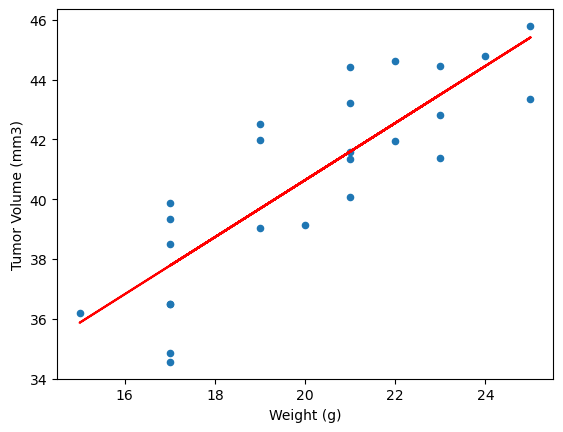

In [61]:
regress_values = xv * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
volume.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
plt.plot(xv,regress_values,"r-")
print(slope)
plt.show


The correlation between mouse weight and the average tumor volume is 0.84


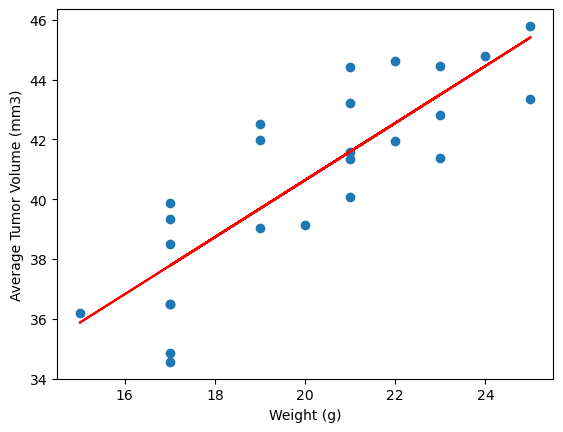

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
